In [1]:
from sklearn import tree

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

directory_2='C:\\Users\\poll\\zzz_Data_science\\1_intro_TO_DS_karpov\\ML_datas\\'

In [63]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:50% !important;hight:50% !important;}</style>"
HTML(style)

In [3]:
sns.set(rc={'figure.figsize':(9,6)})

# ==========================================================

In [4]:
titanic_data=pd.read_csv(directory_2+'titanic\\train.csv')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
Y = titanic_data['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
clf=tree.DecisionTreeClassifier(criterion='entropy')#criterion='entropy'

In [9]:
#clf.fit(X,Y)#error1 - cant work with strings, we have to convert strings to numbs

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
X=pd.get_dummies(X)#convert variables to allowd format
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
#kill extra colunm with sex_male, because we have Sex_female, wich is enough for us


In [13]:
clf=tree.DecisionTreeClassifier(criterion='entropy')#criterion='entropy'

In [14]:
#clf.fit(X,Y)#error2- cant work with NaN, we have to convert strings to numbs

In [15]:
#fix problem with NaN lines- add where median

X = X.fillna({'Age': X['Age'].median()})

In [16]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [17]:
clf=tree.DecisionTreeClassifier(criterion='entropy')#criterion='entropy'

In [18]:
clf.fit(X,Y)#error2 - cant work with NaN, we have to convert strings to numbs

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
import sklearn

#print('The scikit-learn version is {}.'.format(sklearn.__version__))
#tree.plot_tree(clf , feature_names=list(X),class_names=['Negative','Positive'], filled=True)
#tree.plot_tree(clf)

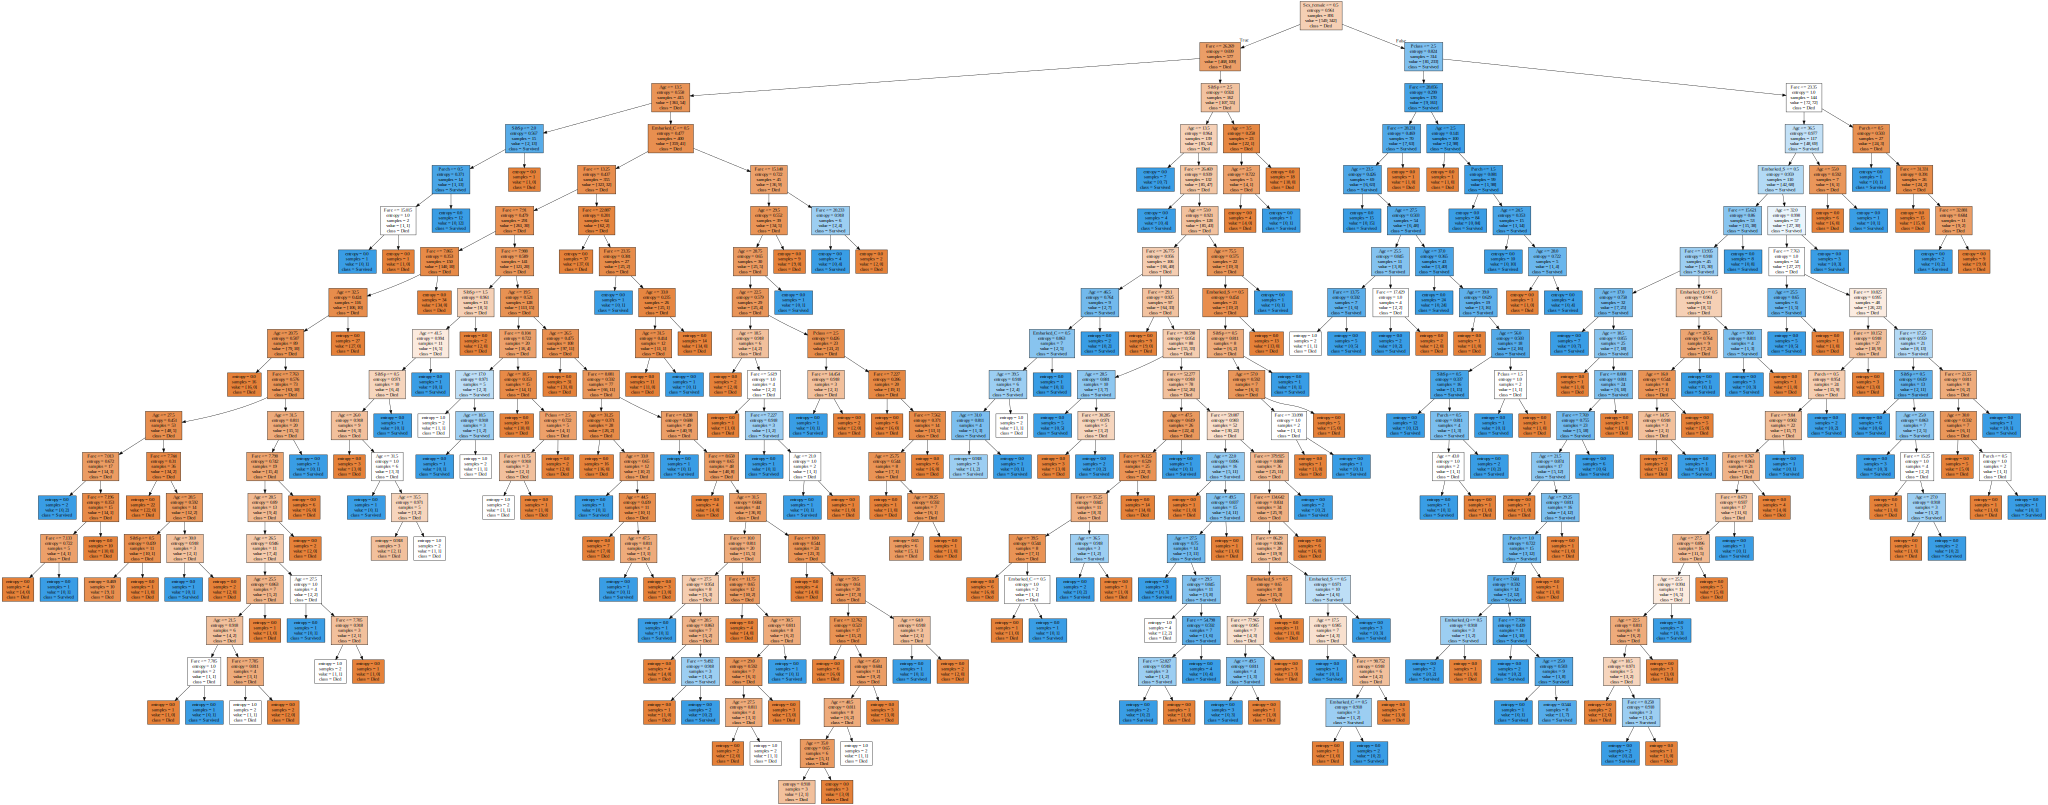

0.9797979797979798

In [20]:
graph = Source(tree.export_graphviz (clf, out_file=None
                                    ,feature_names=list(X),class_names=['Died','Survived']
                                    , filled = True))
display(SVG(graph.pipe(format = 'svg')))
clf.score(X,Y)

In [21]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)

In [24]:
print(X_train.shape,type(X_train))
print(X_test.shape,type(X_test))

print(y_train.shape,type(y_train))
print(y_test.shape,type(y_test))
#clf.fit(X_train,y_train)

(596, 10) <class 'pandas.core.frame.DataFrame'>
(295, 10) <class 'pandas.core.frame.DataFrame'>
(596,) <class 'pandas.core.series.Series'>
(295,) <class 'pandas.core.series.Series'>


In [25]:
clf.score(X,Y)#error2 - cant work with NaN, we have to convert strings to numbs

0.9797979797979798

In [26]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))# NOT REALLY GOOD

0.9798657718120806
0.7728813559322034


In [28]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)#criterion='entropy'
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test)) #BETTER!

0.8238255033557047
0.8203389830508474


# ------------------------------------------------------------------------

In [30]:
max_depth_values = range(1,100)
score_data = pd.DataFrame()
from sklearn.model_selection import cross_val_score

In [31]:
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)#criterion='entropy'
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score =clf.score(X_test,y_test) 
    
    mean_cross_val_score = cross_val_score(clf,X_train,y_train,cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    score_data = score_data.append(temp_score_data)
    

In [32]:
score_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.800303


In [33]:
score_data_long = pd.melt(score_data,id_vars=['max_depth'],value_vars=['train_score','test_score','cross_val_score'],
                          var_name ='set_type',value_name = 'score')

In [34]:
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [35]:
score_data_long.query("set_type == 'cross_val_score'").sort_values('score',ascending = False).head(3)

,max_depth,set_type,score
209,12,cross_val_score,0.802026
211,14,cross_val_score,0.801983
202,5,cross_val_score,0.800303


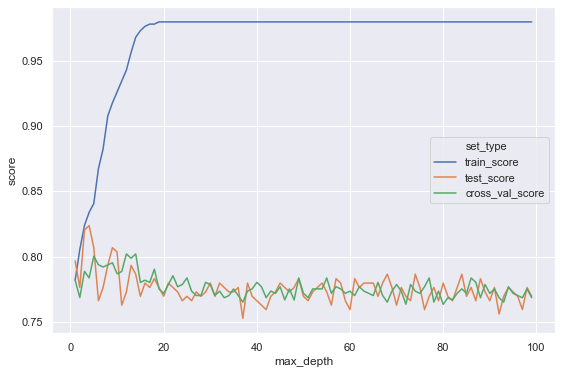

In [36]:
sns.lineplot(x="max_depth", y="score", hue = "set_type", data=score_data_long)

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)#criterion='entropy'

In [39]:
cross_val_score(clf,X_train,y_train,cv=5)#точность которую показал наш классификатор, разбив Х и У трейн на 5 == кусков

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [40]:
cross_val_score(clf,X_train,y_train,cv=5).mean()

0.7835799743626264

In [41]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [42]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
best_clf.score(X_test,y_test)

#cross_val_score(best_clf,X_test,y_test,cv=5).mean()

0.8

# -----------------------------------------------------------------------
# 6

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
params = {'criterion':['gini','entropy'],'max_depth': range(1,30)}

grid_search_cv_clf = GridSearchCV(clf,params, cv=5)

grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [47]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [48]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test,y_test)

0.8067796610169492

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
y_pred_1 = best_clf.predict(X_test)

In [51]:
precision_score(y_true=y_test,y_pred=y_pred_1)

0.7889908256880734

In [52]:
recall_score(y_true=y_test,y_pred=y_pred_1)

0.7166666666666667

In [53]:
y_pred_1

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

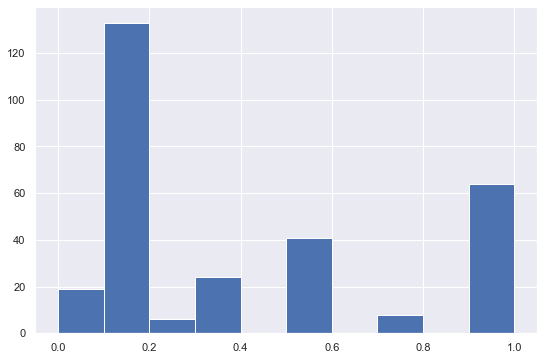

In [54]:
y_predicted_prob = best_clf.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

In [55]:
y_pred_2=np.where(y_predicted_prob[:, 1] > 0.1 ,1 , 0)#>0.2

In [56]:
precision_score(y_true=y_test,y_pred=y_pred_2)

0.4166666666666667

In [57]:
recall_score(y_true=y_test,y_pred=y_pred_2)

0.9583333333333334

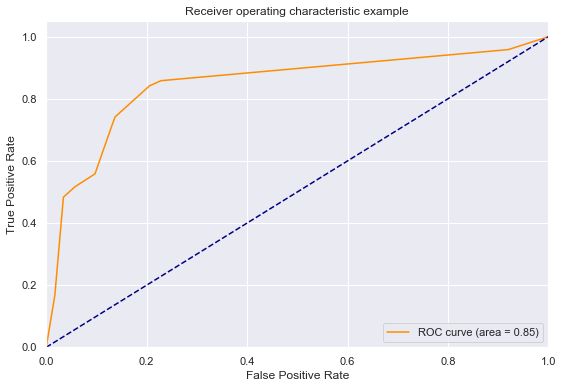

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# -----------------------------------------------------------------------------------
# 3.2

In [68]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_split=100,min_samples_leaf=10)

In [69]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

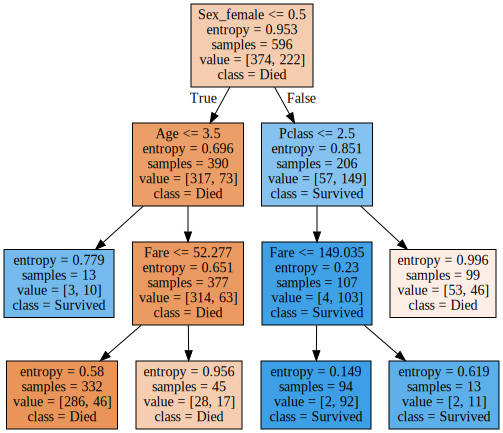

In [70]:
graph = Source(tree.export_graphviz (clf, out_file=None
                                    ,feature_names=list(X),class_names=['Died','Survived']
                                    , filled = True))
display(SVG(graph.pipe(format = 'svg')))
#clf.score(X,Y)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf_rf = RandomForestClassifier()

parametrs = {'n_estimators':[10,20,30], 'max_depth': [2,5,7,10]}

grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv = 5)
grid_search_cv_clf.fit(X_train,y_train)

In [80]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [81]:
best_clf = grid_search_cv_clf.best_estimator_

best_clf.score(X_test, y_test)

0.7966101694915254

In [91]:
feature_importances = best_clf.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
6,Sex_male,0.222944
4,Fare,0.194659
5,Sex_female,0.170793
1,Age,0.156403
0,Pclass,0.114654
2,SibSp,0.044002
3,Parch,0.043542
7,Embarked_C,0.021670
9,Embarked_S,0.021234
8,Embarked_Q,0.010099


# ------------------------------------------------------------------------------------


In [116]:
rf_heart_data=pd.read_csv(directory_2+'datasets_33180_43520_heart.csv')
rf_heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
X_train = rf_heart_data.drop(['target'],axis=1)
y_train = rf_heart_data['target']

In [124]:
rf_heart_data = RandomForestClassifier(10, max_depth = 5)
rf_heart_data.fit(X_train,y_train)
#predictions = rf.predict(x_test)

feature_importances = rf_heart_data.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
7,thalach,0.147842
11,ca,0.141840
12,thal,0.124211
9,oldpeak,0.107396
8,exang,0.101142
2,cp,0.100292
0,age,0.097575
3,trestbps,0.054028
1,sex,0.036925
4,chol,0.034643


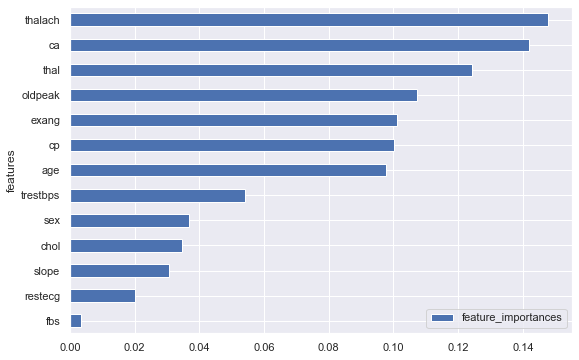

In [125]:
feature_importances_df.sort_values('feature_importances',ascending=True).plot.barh(x='features')

In [ ]:
'''rf_heart_data = RandomForestClassifier()

parametrs = {'n_estimators':[10,20,30], 'max_depth': [2,5,7,10]}

grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv = 5)
grid_search_cv_clf.fit(X_train,y_train)'''

In [ ]:
'''grid_search_cv_clf.best_params_'''

In [ ]:
'''best_clf = grid_search_cv_clf.best_estimator_

best_clf.score(X_test, y_test)'''

In [ ]:
'''feature_importances = best_clf.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)'''

In [61]:
print(

SyntaxError: unexpected EOF while parsing (<ipython-input-61-424fbb3a34c5>, line 1)

# ===============================================
## home tasks

In [ ]:
iris_data=pd.read_csv(directory_2+'iris\\train_iris.csv',index_col=0)
iris_data.head()

In [ ]:
X2 = iris_data.drop(['species'],axis=1)
X2.head()

In [ ]:
Y2 = iris_data['species']
Y2.head()

In [ ]:
iris_data_test=pd.read_csv(directory_2+'iris\\test_iris.csv',index_col=0)
iris_data_test.head()

In [ ]:
X2_test = iris_data_test.drop(['species'],axis=1)
X2_test.head()

In [ ]:
Y2_test = iris_data_test['species']
Y2_test.head()

In [ ]:
X_train,X_test,y_train,y_test = X2,X2_test, Y2,Y2_test

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)

In [ ]:
print(X_train.shape,type(X_train))
print(X_test.shape,type(X_test))

print(y_train.shape,type(y_train))
print(y_test.shape,type(y_test))

#clf.fit(X_train,y_train)
max_depth_values = range(1,100)
score_data2 = pd.DataFrame()

In [ ]:
#cross_val_score(clf_iris,X_train,y_train,cv=5).mean()#точность которую показал наш классификатор, разбив Х и У трейн на 5 == кусков

In [ ]:
for max_depth in max_depth_values:
    #np.random.seed(0)
    clf_iris=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)#criterion='entropy'
    clf_iris.fit(X_train,y_train)
    train_score = clf_iris.score(X_train,y_train)
    test_score =clf_iris.score(X_test,y_test) 
    
    mean_cross_val_score = cross_val_score(clf_iris,X_train,y_train,cv=5).mean()
    #print(mean_cross_val_score)
    
    temp_score_data2 = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    score_data2 = score_data2.append(temp_score_data2)
    

In [ ]:
score_data2.head()

In [ ]:
score_data2_long = pd.melt(score_data2,id_vars=['max_depth'],
                           value_vars=['train_score','test_score','cross_val_score'],
                           var_name ='set_type',value_name = 'score')

In [ ]:
sns.lineplot(x="max_depth", y="score", hue = "set_type", data=score_data2_long)

In [ ]:
dc_data=pd.read_csv(directory_2+'dog_cat\\dogs_n_cats.csv')
dc_data.head()

In [ ]:
X3 = dc_data.drop(['Вид'],axis=1)
Y3 = dc_data['Вид']

print(X3.head())
print(Y3.head())

max_depth=50
score_data3 = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    clf_dc=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)#criterion='entropy'
    clf_dc.fit(X3,Y3)
    train_score = clf_dc.score(X3,Y3)
    #test_score =clf_iris.score(X_test,y_test) 
    
    #mean_cross_val_score = cross_val_score(clf_iris,X_train,y_train,cv=5).mean()
    mean_cross_val_score = cross_val_score(clf_dc,X3,Y3,cv=5).mean()
    #print(mean_cross_val_score)
    
    temp_score_data3 = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    score_data3 = score_data3.append(temp_score_data3)
    

In [ ]:
print(score_data3.head())
score_data3_long = pd.melt(score_data3,id_vars=['max_depth'],
                          value_vars=['train_score','cross_val_score'],
                          var_name ='set_type',value_name = 'score')

score_data3_long.query("score == 1.0" or "set_type == 'cross_val_score'")\
    .sort_values('max_depth',ascending = True).head(3)

In [ ]:
sns.lineplot(x="max_depth", y="score", hue = "set_type", data=score_data3_long)

In [ ]:
clf_dc=tree.DecisionTreeClassifier(criterion='entropy',max_depth=1)#criterion='entropy'
clf_dc.fit(X3,Y3)
train_score = clf_dc.score(X3,Y3)


graph = Source(tree.export_graphviz (clf_dc, out_file=None
                                    ,feature_names=list(X3),class_names=['Died','Survived']
                                    ,filled = True))

display(SVG(graph.pipe(format = 'svg')))
clf_dc.score(X3,Y3)

In [ ]:
#test
dc_data_test=pd.read_json('C:\\Users\\poll\\zzz_Data_science\\dog_cat\\dataset_209691_15.txt')
print(dc_data_test.head())

In [ ]:
y=clf_dc.predict(dc_data_test)
print(y)
print(len(y))

In [ ]:
print('песики',np.sum(y == 'собачка'))
print('котики',np.sum(y == 'котик'))

# ------------------------------------------------------------------------------------

In [ ]:
#test
songs_data=pd.read_csv(directory_2+'songs.csv')
print(songs_data.head())

X4 = songs_data.drop(['song','artist','lyrics'],axis=1)
Y4 = songs_data['artist']

print(X4.head())
print()
print(Y4.head())

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)

X4=pd.get_dummies(X4)#convert variables to allowd format
X4.head()

In [ ]:
'''
print(X_train.shape,type(X_train))
print(X_test.shape,type(X_test))

print(y_train.shape,type(y_train))
print(y_test.shape,type(y_test))
'''

#clf.fit(X_train,y_train)
max_depth_values = range(1,20)
score_data4 = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    #np.random.seed(0)
    clf_songs=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)#criterion='entropy'
    clf_songs.fit(X4,Y4)
    train_score = clf_songs.score(X4,Y4)
    #test_score =clf_songs.score(X_test,y_test) 
    
    mean_cross_val_score = cross_val_score(clf_songs,X4,Y4,cv=5).mean()
    #print(mean_cross_val_score)
    
    temp_score_data4 = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'cross_val_score':[mean_cross_val_score]})#'test_score':[test_score],
    
    score_data4 = score_data4.append(temp_score_data4)

In [ ]:
print(score_data4.head())
score_data4_long = pd.melt(score_data4,id_vars=['max_depth'],
                          value_vars=['train_score','cross_val_score'],
                          var_name ='set_type',value_name = 'score')
'''
score_data4_long.query("score == 1.0" or "set_type == 'cross_val_score'")\
    .sort_values('max_depth',ascending = True).head(3)
'''

In [ ]:
sns.lineplot(x="max_depth", y="score", hue = "set_type", data=score_data4_long)

In [ ]:
clf_songs=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)#criterion='entropy'
clf_songs.fit(X4,Y4)
#train_score = clf_songs.score(X4,Y4)

graph = Source(tree.export_graphviz(clf_songs, out_file=None
                                    ,feature_names=list(X4),class_names=['FALSE','TRU','3'],filled = True))

display(SVG(graph.pipe(format = 'svg')))
clf_songs.score(X4,Y4)

In [ ]:
'''
clf_dc=tree.DecisionTreeClassifier(criterion='entropy',max_depth=1)#criterion='entropy'
clf_dc.fit(X3,Y3)
train_score = clf_dc.score(X3,Y3)


graph = Source(tree.export_graphviz (clf_dc, out_file=None
                                    ,feature_names=list(X3),class_names=['Died','Survived']
                                    ,filled = True))

display(SVG(graph.pipe(format = 'svg')))
clf_dc.score(X3,Y3)
'''

In [ ]:
#test
heart_data=pd.read_csv(directory_2+'train_data_tree.csv')
print(heart_data.head())

X5 = heart_data.drop(['num'],axis=1)
Y5 = heart_data['num']

print(X5.head())
print()
print(Y5.head(),'tytyt')

#print(heart_data.query('num == 1').count())
#print(heart_data.query('num == 0').count())
#print(heart_data.query('num == 1 or num == 0').count())

In [ ]:
heart_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
print(heart_clf)
heart_clf=heart_clf.fit(X5,Y5)
print(heart_clf.score(X5,Y5))

'''
params = {'criterion':['entropy'],'max_depth': range(1,20)}

grid_search_cv_clf = GridSearchCV(heart_clf,params, cv=5)

grid_search_cv_clf.fit(X5,Y5)'''

In [ ]:
print(grid_search_cv_clf.best_params_)
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X5,Y5)

In [ ]:
tree.plot_tree(heart_clf) 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(heart_clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("heart") 

dot_data = tree.export_graphviz(heart_clf, out_file=None, 
                      feature_names=list(X5),  
                      class_names=['ok','not oke'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [ ]:
heart_clf.tree_.children_left[3]

In [ ]:
heart_clf.tree_.n_node_samples[1]#сколько в узле представителей

In [ ]:
round(heart_clf.tree_.impurity[0],3)#сколько в узле энтрапия

In [ ]:
round(heart_clf.tree_.impurity[0],3) - round((53*round(heart_clf.tree_.impurity[2],3)+104*round(heart_clf.tree_.impurity[3],3)+16*round(heart_clf.tree_.impurity[5],3)+65*round(heart_clf.tree_.impurity[6],3))/238,3) 

In [ ]:
round(heart_clf.tree_.impurity[0],3) - round((157*round(heart_clf.tree_.impurity[1],3)+81*round(heart_clf.tree_.impurity[4],3))/238,3) 

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X6 = iris.data 
Y6 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X6,Y6,test_size = 0.25,train_size = 0.75, random_state=42)

dt = tree.DecisionTreeClassifier(criterion='entropy')
print(dt)
dt=dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))

print(dt.score(X_test,y_test))

predicted = dt.predict(X_test)
predicted

In [ ]:
params = {'criterion':['entropy'],'max_depth': range(1,10),'min_samples_split': range(2,10),'min_samples_leaf': range(1,10)}

search = GridSearchCV(dt, params, cv=5)
search.fit(X6,Y6)

In [ ]:
print(search.best_params_)
best_tree = search.best_estimator_
best_tree.score(X6,Y6)